In [67]:
import pandas as pd # 引用套件並縮寫為 pd  
df_capterra = pd.read_csv('Capterra_comments.csv', encoding='utf_8_sig') 
df_capterra

,Unnamed: 0,Review,Title,Overall,Pros,Cons,Switch,Switch_reason,Alter,Alter_reason
0,0,1,“Must use storage option for official works.”,"I mainly use Dropbox for my office work, yo s...",Most important features Dropbox provides from...,Since we are using Dropbox for organizational...,Box,"For professional work , need to switch with a...",NaN,NaN
1,1,2,“Best for High-Res Work”,User-friendly and easy to manage files,The pricing plans are reasonable and it allow...,I have not come across any cons to their soft...,WeTransfer,Because a major upgrade in features and integ...,Google Drive and OneDrive,"Features, integration possibilities, and capa..."
2,2,3,“Still A Clunky Product After 5+ Years of Use”,"Dropbox Business has, for the most part, been...","In terms of basic file sharing (documents, vi...",I seem to constantly run into strange issues ...,NaN,NaN,NaN,NaN
3,3,4,“Dropbox business a perfect solution for cloud...,The dropbox business is valuable tool if you ...,The security features are the best features f...,Sync and integration issues require most atte...,NaN,NaN,Google Drive,The overall working capabilities and feature ...
4,4,5,“Safely Store Business Data On Cloud Space For...,Dropbox helps our business by storing all of ...,\tEasiest way to store and share files online...,No issue was faced with Dropbox because all t...,NaN,NaN,Google Drive and OneDrive,We found the most valuable and cheapest Dropb...
5,5,6,“Straightforward and stress free cloud storage ”,Dropbox has been a stellar performer when it ...,"Easy adaptability, getting used to Dropbox is...",Honestly there are no deal breaking cons that...,WeTransfer,Drop box had better features compared to We t...,NaN,NaN
6,6,7,“Work Remotely? You need Dropbox”,I've been using it for years and have no plan...,"I love having all of my files in one, central...",Sometimes I have to set files that I haven't ...,NaN,NaN,Google Drive and OneDrive,I like the way dropbox integrates with my mac...
7,7,8,“Perfect backup tool for cloud storage”,It has been a good software if I base it on s...,First when I am uploading files it gives me t...,It is relatively expensive for paid accounts....,NaN,NaN,OneDrive,With Dropbox you can work with hundreds of fi...
8,8,9,“Dropbox - Review”,The software is very helpful in maintaining a...,Its ability to automatically store the data o...,The mobile application is not as good as the ...,WeTransfer,Wetransfer only allows us to share informatio...,NaN,NaN
9,9,10,“Dropbox is the cloud storage of choice ”,Dropbox Business can handle all of the compan...,Rich features and great support for the busin...,The price still high in comparison with alter...,NaN,NaN,"Google Drive, Box and OneDrive",Dropbox Business have all the requirements of...


## Overall 計算各斷詞出現次數

In [68]:
text=''
for overall in df_capterra['Overall']:
    text += overall
path = 'overall.txt'
f = open(path, 'w',encoding="utf-8")
f.write(text)
f.close()

In [69]:
# ! wget -O shakespeare-hamlet.txt https://raw.githubusercontent.com/teropa/nlp/master/resources/corpora/gutenberg/shakespeare-hamlet.txt #download shakespeare-hamlet.txt 
import nltk, re 
hamlet_text = open('overall.txt',encoding="utf-8").read().lower()
nltk.download('punkt')
tokens = nltk.word_tokenize(hamlet_text)

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
# remove stopwords and punctuation from tokens
filtered_tokens = [w for w in tokens if w not in stopwords and w.isalnum()]
# print(filtered_tokens)
text_draw = ' '.join(filtered_tokens) # convert filterd_tokens return to text
# print (text_draw)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lindy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lindy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
def term_count(term, token_doc):
    tf = token_doc.count(term)
    return tf

text_tf = {}
for word in filtered_tokens:
    text_tf[word] = term_count(word, filtered_tokens)
# print(text_tf)
freq = nltk.FreqDist(text_tf)
# print("Top 10 frequency word", freq.most_common(10))

In [71]:
import csv
with open('Overall_frequency_word.csv', 'w',encoding='utf_8_sig') as f:
    for key in text_tf.keys():
        f.write("%s,%s\n"%(key,text_tf[key]))

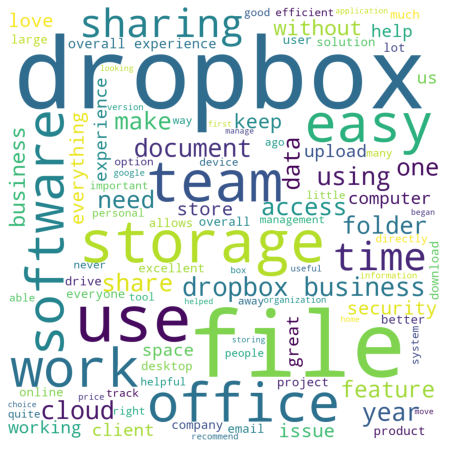

In [72]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words = 100, width = 1000, height = 1000, background_color="white")
wc.generate(text_draw)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(wc)
plt.show()
# save wordcloud
wc.to_file("wordcloud.jpg")

## Pros 計算各斷詞出現次數

In [73]:
text=''
for overall in df_capterra['Pros']:
    text += overall
path = 'Pros.txt'
f = open(path, 'w',encoding="utf-8")
f.write(text)
f.close()

In [74]:
# ! wget -O shakespeare-hamlet.txt https://raw.githubusercontent.com/teropa/nlp/master/resources/corpora/gutenberg/shakespeare-hamlet.txt #download shakespeare-hamlet.txt 
import nltk, re 
hamlet_text = open('Pros.txt',encoding="utf-8").read().lower()
nltk.download('punkt')
tokens = nltk.word_tokenize(hamlet_text)

# remove stopwords and punctuation from tokens
filtered_tokens = [w for w in tokens if w not in stopwords and w.isalnum()]
# print(filtered_tokens)
text_draw = ' '.join(filtered_tokens) # convert filterd_tokens return to text
# print (text_draw)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lindy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [75]:
text_tf = {}
for word in filtered_tokens:
    text_tf[word] = term_count(word, filtered_tokens)
# print(text_tf)
freq = nltk.FreqDist(text_tf)
# print("Top 10 frequency word", freq.most_common(10))

In [76]:
import csv
with open('Pros_frequency_word.csv', 'w',encoding='utf_8_sig') as f:
    for key in text_tf.keys():
        f.write("%s,%s\n"%(key,text_tf[key]))

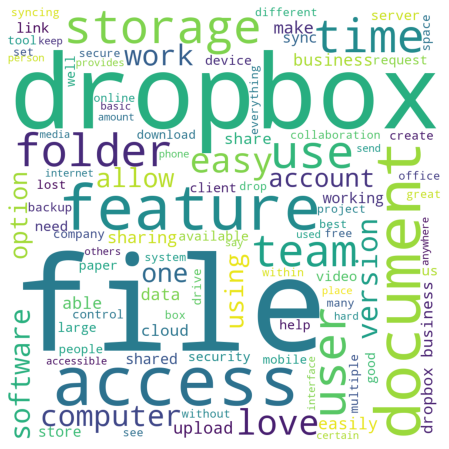

In [77]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words = 100, width = 1000, height = 1000, background_color="white")
wc.generate(text_draw)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(wc)
plt.show()
# save wordcloud
wc.to_file("wordcloud.jpg")

## Cons 計算各斷詞出現次數

In [78]:
text=''
for overall in df_capterra['Cons']:
    text += overall
path = 'Cons.txt'
f = open(path, 'w',encoding="utf-8")
f.write(text)
f.close()

In [79]:
# ! wget -O shakespeare-hamlet.txt https://raw.githubusercontent.com/teropa/nlp/master/resources/corpora/gutenberg/shakespeare-hamlet.txt #download shakespeare-hamlet.txt 
import nltk, re 
hamlet_text = open('Cons.txt',encoding="utf-8").read().lower()
nltk.download('punkt')
tokens = nltk.word_tokenize(hamlet_text)

# remove stopwords and punctuation from tokens
filtered_tokens = [w for w in tokens if w not in stopwords and w.isalnum()]
# print(filtered_tokens)
text_draw = ' '.join(filtered_tokens) # convert filterd_tokens return to text
# print (text_draw)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lindy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [80]:
text_tf = {}
for word in filtered_tokens:
    text_tf[word] = term_count(word, filtered_tokens)
# print(text_tf)
freq = nltk.FreqDist(text_tf)
# print("Top 10 frequency word", freq.most_common(10))

In [81]:
import csv
with open('Cons_frequency_word.csv', 'w',encoding='utf_8_sig') as f:
    for key in text_tf.keys():
        f.write("%s,%s\n"%(key,text_tf[key]))

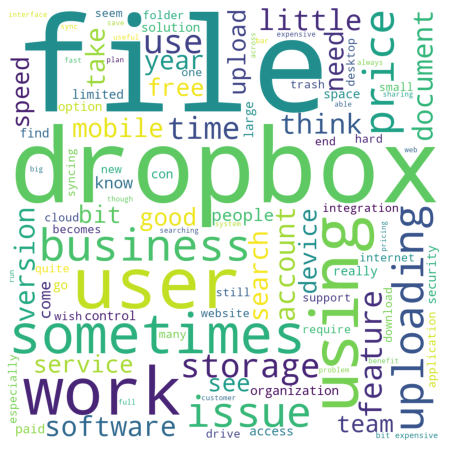

In [82]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words = 100, width = 1000, height = 1000, background_color="white")
wc.generate(text_draw)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(wc)
plt.show()
# save wordcloud
wc.to_file("wordcloud.jpg")

## Switch 計算各斷詞出現次數

In [95]:
text=''
for overall in df_capterra['Switch']:
    if str(overall) != 'nan':
        text += str(overall)
path = 'Switch.txt'
f = open(path, 'w',encoding="utf-8")
f.write(text)
f.close()

In [96]:
# ! wget -O shakespeare-hamlet.txt https://raw.githubusercontent.com/teropa/nlp/master/resources/corpora/gutenberg/shakespeare-hamlet.txt #download shakespeare-hamlet.txt 
import nltk, re 
hamlet_text = open('Switch.txt',encoding="utf-8").read().lower()
nltk.download('punkt')
tokens = nltk.word_tokenize(hamlet_text)

# remove stopwords and punctuation from tokens
filtered_tokens = [w for w in tokens if w not in stopwords and w.isalnum()]
# print(filtered_tokens)
text_draw = ' '.join(filtered_tokens) # convert filterd_tokens return to text
# print (text_draw)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lindy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [97]:
text_tf = {}
for word in filtered_tokens:
    text_tf[word] = term_count(word, filtered_tokens)
# print(text_tf)
freq = nltk.FreqDist(text_tf)
# print("Top 10 frequency word", freq.most_common(10))

In [98]:
import csv
with open('Switch_frequency_word.csv', 'w',encoding='utf_8_sig') as f:
    for key in text_tf.keys():
        f.write("%s,%s\n"%(key,text_tf[key]))

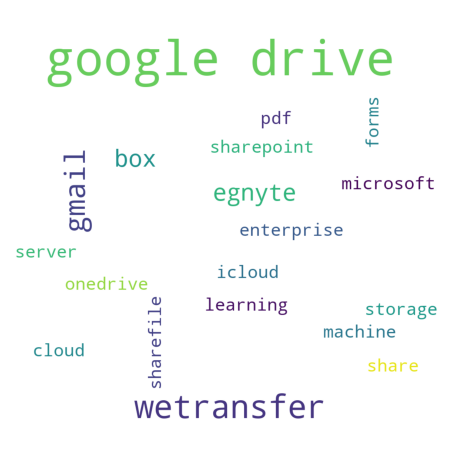

In [99]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words = 100, width = 1000, height = 1000, background_color="white")
wc.generate(text_draw)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(wc)
plt.show()
# save wordcloud
wc.to_file("wordcloud.jpg")

## Switch_reason 計算各斷詞出現次數

In [100]:
text=''
for overall in df_capterra['Switch_reason']:
    if str(overall) != 'nan':
        text += str(overall)
path = 'Switch_reason.txt'
f = open(path, 'w',encoding="utf-8")
f.write(text)
f.close()

In [101]:
# ! wget -O shakespeare-hamlet.txt https://raw.githubusercontent.com/teropa/nlp/master/resources/corpora/gutenberg/shakespeare-hamlet.txt #download shakespeare-hamlet.txt 
import nltk, re 
hamlet_text = open('Switch_reason.txt',encoding="utf-8").read().lower()
nltk.download('punkt')
tokens = nltk.word_tokenize(hamlet_text)

# remove stopwords and punctuation from tokens
filtered_tokens = [w for w in tokens if w not in stopwords and w.isalnum()]
# print(filtered_tokens)
text_draw = ' '.join(filtered_tokens) # convert filterd_tokens return to text
# print (text_draw)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lindy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [102]:
text_tf = {}
for word in filtered_tokens:
    text_tf[word] = term_count(word, filtered_tokens)
# print(text_tf)
freq = nltk.FreqDist(text_tf)
# print("Top 10 frequency word", freq.most_common(10))

In [103]:
import csv
with open('Switch_reason_frequency_word.csv', 'w',encoding='utf_8_sig') as f:
    for key in text_tf.keys():
        f.write("%s,%s\n"%(key,text_tf[key]))

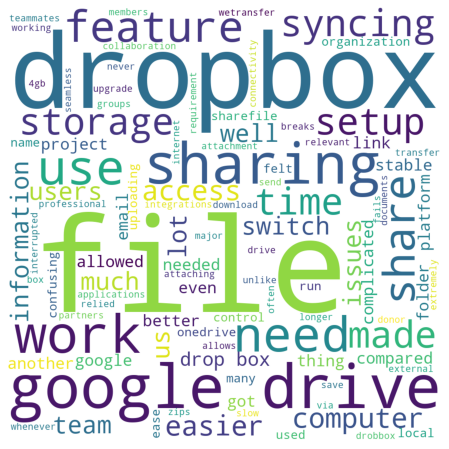

In [104]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words = 100, width = 1000, height = 1000, background_color="white")
wc.generate(text_draw)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(wc)
plt.show()
# save wordcloud
wc.to_file("wordcloud.jpg")

## Alter 計算各斷詞出現次數

In [115]:
text=''
for overall in df_capterra['Alter']:
    if str(overall) != 'nan':
        text += str(overall)
path = 'Alter.txt'
f = open(path, 'w',encoding="utf-8")
f.write(text)
f.close()

In [116]:
# ! wget -O shakespeare-hamlet.txt https://raw.githubusercontent.com/teropa/nlp/master/resources/corpora/gutenberg/shakespeare-hamlet.txt #download shakespeare-hamlet.txt 
import nltk, re 
hamlet_text = open('Alter.txt',encoding="utf-8").read().lower()
nltk.download('punkt')
tokens = nltk.word_tokenize(hamlet_text)

# remove stopwords and punctuation from tokens
filtered_tokens = [w for w in tokens if w not in stopwords and w.isalnum()]
# print(filtered_tokens)
text_draw = ' '.join(filtered_tokens) # convert filterd_tokens return to text
# print (text_draw)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lindy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [117]:
text_tf = {}
for word in filtered_tokens:
    text_tf[word] = term_count(word, filtered_tokens)
# print(text_tf)
freq = nltk.FreqDist(text_tf)
# print("Top 10 frequency word", freq.most_common(10))

In [118]:
import csv
with open('Alter_frequency_word.csv', 'w',encoding='utf_8_sig') as f:
    for key in text_tf.keys():
        f.write("%s,%s\n"%(key,text_tf[key]))

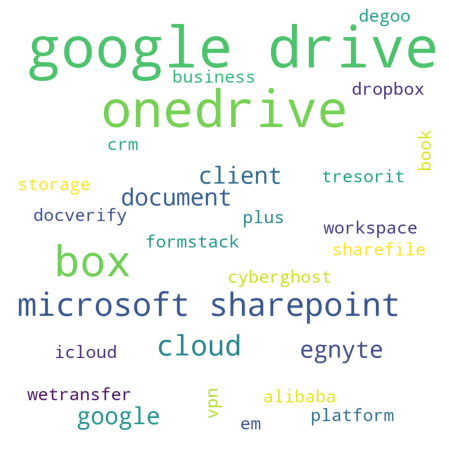

In [119]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words = 100, width = 1000, height = 1000, background_color="white")
wc.generate(text_draw)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(wc)
plt.show()
# save wordcloud
wc.to_file("wordcloud.jpg")

## Alter_reason 計算各斷詞出現次數

In [120]:
text=''
for overall in df_capterra['Alter_reason']:
    if str(overall) != 'nan':
        text += str(overall)
path = 'Alter_reason.txt'
f = open(path, 'w',encoding="utf-8")
f.write(text)
f.close()

In [121]:
# ! wget -O shakespeare-hamlet.txt https://raw.githubusercontent.com/teropa/nlp/master/resources/corpora/gutenberg/shakespeare-hamlet.txt #download shakespeare-hamlet.txt 
import nltk, re 
hamlet_text = open('Alter_reason.txt',encoding="utf-8").read().lower()
nltk.download('punkt')
tokens = nltk.word_tokenize(hamlet_text)

# remove stopwords and punctuation from tokens
filtered_tokens = [w for w in tokens if w not in stopwords and w.isalnum()]
# print(filtered_tokens)
text_draw = ' '.join(filtered_tokens) # convert filterd_tokens return to text
# print (text_draw)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lindy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [122]:
text_tf = {}
for word in filtered_tokens:
    text_tf[word] = term_count(word, filtered_tokens)
# print(text_tf)
freq = nltk.FreqDist(text_tf)
# print("Top 10 frequency word", freq.most_common(10))

In [123]:
import csv
with open('Alter_reason_frequency_word.csv', 'w',encoding='utf_8_sig') as f:
    for key in text_tf.keys():
        f.write("%s,%s\n"%(key,text_tf[key]))

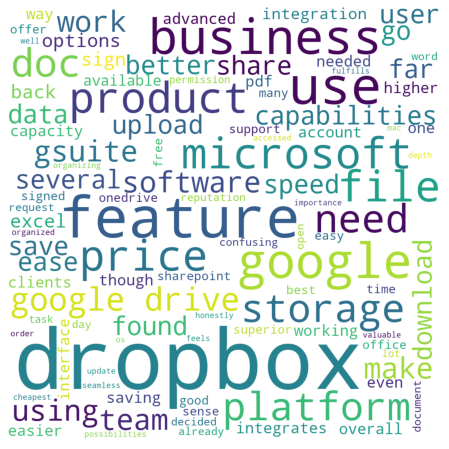

In [124]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words = 100, width = 1000, height = 1000, background_color="white")
wc.generate(text_draw)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(wc)
plt.show()
# save wordcloud
wc.to_file("wordcloud.jpg")